Libraries

In [ ]:
import shutil
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 57.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
# Define source and destination paths
destination_path = "/content/drive/MyDrive/sms_spam_dataset"

# Move the dataset
shutil.move(path, destination_path)

'/content/drive/MyDrive/sms_spam_dataset/1'

In [ ]:
 os.listdir(destination_path)

['spam.csv', '1']

## understand the structure of the data

In [ ]:
spam_1_df = pd.read_csv(destination_path + "/spam.csv", encoding='latin-1')

In [ ]:
spam_1_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
not_null_mask = spam_1_df['Unnamed: 2'].notnull()
not_null_rows = spam_1_df[not_null_mask]

In [ ]:
not_null_rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [ ]:
pd.set_option('display.max_colwidth', 200)
not_null_rows['Unnamed: 2'].head()

,Unnamed: 2
95,PO Box 5249
281,the person is definitely special for u..... But if the person is so special
444,"HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\"""""
671,"wanted to say hi. HI!!!\"" Stop? Send STOP to 62468"""
710,"this wont even start........ Datz confidence.."""


I noticed that Unnamed: 2 ,	Unnamed: 3 ,	Unnamed: 4 columns contain a lot of missing values

and mainly the length of sentence of non-null rows in these columns are relatively small

so we can ignore it since filling methods will require more knowledge about the columns than the one we actually have



In [ ]:
new_df = spam_1_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


rename columns and reorder them

In [ ]:
new_df = new_df.rename(columns={"v1": "target", "v2": "email"})
new_df = new_df.iloc[:, [1,0]]
new_df.head()

,email,target
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5572 non-null   object
 1   target  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
new_df.isna().sum()

,0
email,0
target,0


In [ ]:
print(new_df.duplicated().sum())

403


I noticed that there is repetition, let's take a closer look at the duplicated rows

In [ ]:
new_df[new_df.duplicated()].head()


,email,target
102,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,ham
153,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,ham
206,"As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.",ham
222,"Sorry, I'll call later",ham
325,No calls..messages..missed calls,ham


The best practice is to drop duplicated rows and to do so I will use **drop_duplicates** that basically keep the first row of the duplicated rows and drop the rest

In [ ]:
new_df.drop_duplicates()


,email,target
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


## cleaned data from null and duplicates

Now the data is a little bit cleaner where:

1) the data has no null values

2) the data has no duplicated emails

## Check for the class balance

<BarContainer object of 2 artists>

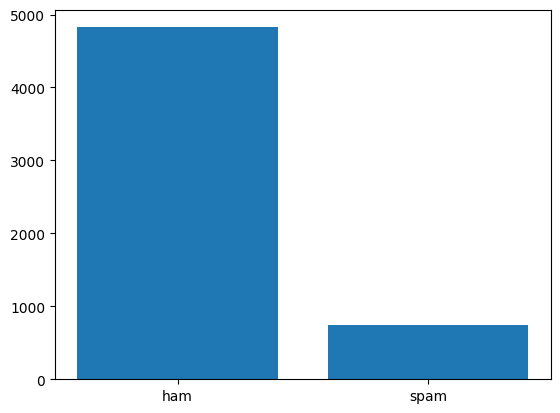

In [ ]:
# new_df['target'].value_counts()
plt.bar(new_df['target'].unique() ,new_df['target'].value_counts())


although there is a class imbalance but it comes from reality where we notice in real world that the number of spams is less than regular emails

solutions:
as we suggested in the draft

we will work on Lexical & Content-Based Evasion Experiment

- where we will try to generate spam messages
- it will help increasing the dataset diversity thus fix the class imbalance
- it will also improve the model accuracy

In [ ]:
new_df.iloc[2][0]

<ipython-input-35-60e2ad5faafd>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_df.iloc[2][0]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

I noticed that the text needs some processing where there is the following to consider:

1) there is some meangingless numbers

2) the same words are written in different letter cases

3) there are punctuations

## prepcrossing data

But since this dataset is going to be shared for between all of the models:
- Logistic regression model
- LSTM model
- Bert model

The preprocessing approach that I will follow is going to be general since for example:

- in LSTM, we will need word embedding technique which required data to be stemmed
- in Bert fine tuning, the data needs to be as natural as possible



Precprocessing steps I followed:

1) Standardizing Whitespaces (removes extra spaces, tabs, and newlines)

2) Remove HTML Tags & URLs

3) Remove Non-ASCII Characters (e.g., emojis, foreign symbols)

In [ ]:
import re
import string
import unicodedata

def clean_text(text):
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    # 1. Standardizing Whitespaces (removes extra spaces, tabs, and newlines)
    text = re.sub(r'\s+', ' ', text).strip()

    # 2. Remove HTML Tags & URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs

    # 3. Remove Non-ASCII Characters (e.g., emojis, foreign symbols)
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C' and ord(char) < 128)

    # 4. Remove Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text


In [ ]:
# Example Usage
data_example = pd.DataFrame({'email': [
    "Hello!  Visit <a href='https://example.com'>this link</a> now! 😊",
    "Check this out: www.example.com     New updates available!",
    "    This    has  extra spaces     and tabs.    "
]})


data_example['cleaned_email'] = data_example['email'].apply(clean_text)
data_example

,email,cleaned_email
0,Hello! Visit <a href='https://example.com'>this link</a> now! 😊,Hello! Visit this link now!
1,Check this out: www.example.com New updates available!,Check this out: New updates available!
2,This has extra spaces and tabs.,This has extra spaces and tabs.


In [ ]:
new_df['email'] = new_df['email'].apply(clean_text)

## Splitting the dataset

1) I ensure that the results are reproducible by setting `random_state=42` parameter

2) I ensure an even class distribution across splits by setting `stratify=new_df['target']` parameter



In [ ]:
# First, split into train (80%) and test (20%)
train_data, test_data = train_test_split(new_df, test_size=0.2, random_state=42, stratify=new_df['target'])

# Then, split the train set further into train (80%) and validation (20%)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['target'])

# Save the datasets
train_data.to_csv("train.csv", index=False)
val_data.to_csv("val.csv", index=False)
test_data.to_csv("test.csv", index=False)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")


Train size: 3565, Validation size: 892, Test size: 1115


In [ ]:
print('train dataset: \n',train_data['target'].value_counts())
print('val dataset: \n',val_data['target'].value_counts())
print('test dataset: \n',test_data['target'].value_counts())

train dataset: 
 target
ham     3087
spam     478
Name: count, dtype: int64
val dataset: 
 target
ham     772
spam    120
Name: count, dtype: int64
test dataset: 
 target
ham     966
spam    149
Name: count, dtype: int64


## Enron-Spam dataset

  Taking a look at the second dataset structure

In [ ]:
import kagglehub

# Download latest version
path_2 = kagglehub.dataset_download("wanderfj/enron-spam")

print("Path to dataset files:", path_2)

100%|██████████| 28.8M/28.8M [00:01<00:00, 27.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wanderfj/enron-spam/versions/1


In [ ]:
# Define source and destination paths
destination_path_2 = "/content/drive/MyDrive/enron-spam_dataset"

# Move the dataset
shutil.move(path, destination_path_2)

In [ ]:
os.listdir(path_2 + '/enron1/spam')[:10]

In [ ]:
# check the number of datasets included and what are they
print("the number of datasets included is: ",len(os.listdir(path_2)), "\n")
print("the datasets included are: ",os.listdir(path_2), "\n")

#explore dataset 1
print("explore dataset enron1","\n")
print("the files included are: ",os.listdir(path_2 + '/enron1'), "\n")

# check the number of spam samples
print("the number of spam samples : ",len(os.listdir(path_2 + '/enron1/spam')),"\n")

# check the ham number of samples
print("the number of ham samples: ",len(os.listdir(path_2 + '/enron1/ham')),"\n")

# check an example of one of the spam emails
print("example of spam email (2092.2004-09-08.GP.spam.txt) : ","\n")
f = open("/root/.cache/kagglehub/datasets/wanderfj/enron-spam/versions/1/enron1/spam/2092.2004-09-08.GP.spam.txt", "r")
print(f.read())

# check the summary file
print("the summary file of enron1 : ","\n")
f = open("/root/.cache/kagglehub/datasets/wanderfj/enron-spam/versions/1/enron1/Summary.txt", "r")
print(f.read())

the number of datasets included is:  6 

the datasets included are:  ['enron1', 'enron2', 'enron5', 'enron6', 'enron3', 'enron4'] 

explore dataset enron1 

the files included are:  ['spam', 'Summary.txt', 'ham'] 

the number of spam samples :  1500 

the number of ham samples:  3672 

example of spam email (2092.2004-09-08.GP.spam.txt) :  

Subject: cialis , valium , viagra , xanax at low price ! no prescription needed !
discount rx is simple , quick , and affordable ! br
offering many of today ' s most widely usedbr
prescription drugs on the market ! brbr
zoloft , xanax , ambien , paxil , valium , viagra and many more !
br
just click below for these special savings !
a href = http : / / www . grand 2 packz . com / index . php ? id = 188 click here now !

the summary file of enron1 :  

Legitimate
----------
- Owner: farmer-d
- Total number: 3672 emails
- Date of first email: 1999-12-10
- Date of last email: 2002-01-11
- Similars deletion: No
- Encoding: No


Spam
----
- Owner: GP
- T

create a dataframe of two columns (text, label) from the folders structure

In [ ]:
def create_df_from_enron(main_folder):
    data = []

    for label in ['spam', 'ham']:
        folder_path = os.path.join(main_folder, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                data.append([content, label])

    df = pd.DataFrame(data, columns=['email', 'target'])

    df = shuffle(df, random_state=42).reset_index(drop=True)

    return df


In [ ]:
main_folder = path_2 + '/enron1'
enron1_df = create_df_from_enron(main_folder)
enron1_df.head()

,email,target
0,Subject: feedback monitor error - meter 984132...,ham
1,Subject: investinme . enron . com login inform...,ham
2,Subject: is your wife in pain\nstop the pain\n...,spam
3,Subject: same day change - revision # 1 - enro...,ham
4,Subject: txu fuel co . nom . s for 2 / 21 / 01...,ham


check for null and duplicated

In [ ]:
print(enron1_df.duplicated().sum())

178


In [ ]:
print(enron1_df.isna().sum())

email     0
target    0
dtype: int64


so the data contain about 178 duplicated values, so I will drop them

In [ ]:
enron1_df.drop_duplicates(inplace=True)

In [ ]:
enron1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 5171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   4994 non-null   object
 1   target  4994 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


In [ ]:
enron1_df.iloc[1,0]

'Subject: investinme . enron . com login information\nthis is an auto - generated e - mail .\nfrom : training services ( auto - generated )\nsent : tuesday , march 6 , 2001\nto : jerry farmer\nsubject : investinme . enron . com login information\ndear jerry farmer , log into investinme . enron . com with the following login id\nand password :\nlogin id - dfarmer @ enron . com\npassword - farmerj 55548\nthe first step is to get started with a login id and password noted above .\nweb site demonstrations will be held in eb 568 march 6 th , from 9 - 5 a . m .\n( every half hour ) . please plan to attend one session . if you have any\nquestions regarding your login information , you can contact the development\ncenter on x 3 - 0357 .\ninvestinme . enron . com is a new tool to help you manage your professional\ndevelopment . it brings together the listings of internal programs , as well as\naccess to register from a database of external programs , on - line courses and\nmaterials .'

preprcoess the email column

I will apply the exact same function I applied on the previous dataset

In [ ]:
enron1_df['email'] = enron1_df['email'].apply(clean_text)


In [ ]:
enron1_df.iloc[1,0]

'Subject investinme  enron  com login information this is an auto  generated e  mail  from  training services  auto  generated  sent  tuesday  march 6  2001 to  jerry farmer subject  investinme  enron  com login information dear jerry farmer  log into investinme  enron  com with the following login id and password  login id  dfarmer  enron  com password  farmerj 55548 the first step is to get started with a login id and password noted above  web site demonstrations will be held in eb 568 march 6 th  from 9  5 a  m   every half hour   please plan to attend one session  if you have any questions regarding your login information  you can contact the development center on x 3  0357  investinme  enron  com is a new tool to help you manage your professional development  it brings together the listings of internal programs  as well as access to register from a database of external programs  on  line courses and materials '

## Splitting datasets

In [ ]:
# First, split into train (80%) and test (20%)
train_data, test_data = train_test_split(enron1_df, test_size=0.2, random_state=42, stratify=enron1_df['target'])

# Then, split the train set further into train (80%) and validation (20%)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['target'])

# Save the datasets
train_data.to_csv("enron1_train.csv", index=False)
val_data.to_csv("enron1_val.csv", index=False)
test_data.to_csv("enron1_test.csv", index=False)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

print('train dataset: \n',train_data['target'].value_counts())
print('val dataset: \n',val_data['target'].value_counts())
print('test dataset: \n',test_data['target'].value_counts())

Train size: 3196, Validation size: 799, Test size: 999
train dataset: 
 target
ham     2260
spam     936
Name: count, dtype: int64
val dataset: 
 target
ham     565
spam    234
Name: count, dtype: int64
test dataset: 
 target
ham     706
spam    293
Name: count, dtype: int64


## explore with another enron dataset

In [ ]:
datasets = os.listdir(path_2)
for name in datasets:
  dataset_name = '/' + name
  #explore dataset 1
  print("explore dataset "+ dataset_name,"\n")
  print("the files included are: ",os.listdir(path_2 + dataset_name), "\n")

  # check the number of spam samples
  print("the number of spam samples : ",len(os.listdir(path_2 + dataset_name + '/spam')),"\n")

  # check the ham number of samples
  print("the number of ham samples: ",len(os.listdir(path_2 + dataset_name + '/ham')),"\n")

  # check the summary file
  print("the summary file of enron1 : ","\n")
  f = open("/root/.cache/kagglehub/datasets/wanderfj/enron-spam/versions/1" +dataset_name +"/Summary.txt", "r")
  print(f.read())


explore dataset /enron1 

the files included are:  ['spam', 'Summary.txt', 'ham'] 

the number of spam samples :  1500 

the number of ham samples:  3672 

the summary file of enron1 :  

Legitimate
----------
- Owner: farmer-d
- Total number: 3672 emails
- Date of first email: 1999-12-10
- Date of last email: 2002-01-11
- Similars deletion: No
- Encoding: No


Spam
----
- Owner: GP
- Total number: 1500 emails
- Date of first email: 2003-12-18
- Date of last email: 2005-09-06
- Similars deletion: No
- Encoding: No

Spam:Legitimate rate = 1:3
Total number of emails (legitimate + spam): 5975

explore dataset /enron2 

the files included are:  ['spam', 'Summary.txt', 'ham'] 

the number of spam samples :  1496 

the number of ham samples:  4361 

the summary file of enron1 :  

Legitimate
----------
- Owner: kaminski-v
- Total number: 4361 emails
- Date of first email: 1999-12-10
- Date of last email: 2001-05-22
- Similars deletion: No
- Encoding: No


Spam
----
- Owner: SpamAssassin + Ho

I noticed that all of the remaining datasets collected and published between 2002 and 2005 which makes all of them probably contain a similar spam envasion methods

I will select then the dataset that contains a higher number of data samples which is enron2

In [ ]:
main_folder = path_2 + '/enron2'
enron2_df = create_df_from_enron(main_folder)
enron2_df.head()

,email,target
0,"Subject: missing prc information\nvince , the ...",ham
1,Subject: seismic data via satellite\ni am prep...,ham
2,Subject: re : telephone interview with the res...,ham
3,Subject: have you ever bought drugs online ?\n...,spam
4,Subject: re : oracle tables which contain the ...,ham


check for null values and duplicates

In [ ]:
print("number of duplicates: ",enron2_df.duplicated().sum())
print(enron2_df.isna().sum())

number of duplicates:  33
email     0
target    0
dtype: int64


I noticed that the data contains 33 duplicated entries so I will drop them

In [ ]:
enron2_df.drop_duplicates(inplace=True)

In [ ]:
enron2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5824 entries, 0 to 5856
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5824 non-null   object
 1   target  5824 non-null   object
dtypes: object(2)
memory usage: 136.5+ KB


In [ ]:
enron2_df['email'] = enron2_df['email'].apply(clean_text)

splitting datasets

In [ ]:
# First, split into train (80%) and test (20%)
train_data, test_data = train_test_split(enron2_df, test_size=0.2, random_state=42, stratify=enron2_df['target'])

# Then, split the train set further into train (80%) and validation (20%)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['target'])

# Save the datasets
train_data.to_csv("enron2_train.csv", index=False)
val_data.to_csv("enron2_val.csv", index=False)
test_data.to_csv("enron2_test.csv", index=False)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

print('train dataset: \n',train_data['target'].value_counts())
print('val dataset: \n',val_data['target'].value_counts())
print('test dataset: \n',test_data['target'].value_counts())

Train size: 3727, Validation size: 932, Test size: 1165
train dataset: 
 target
ham     2769
spam     958
Name: count, dtype: int64
val dataset: 
 target
ham     693
spam    239
Name: count, dtype: int64
test dataset: 
 target
ham     866
spam    299
Name: count, dtype: int64
